In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)


from collections import Counter, defaultdict


from sklearn import preprocessing
# from sklearn import manifold
from sklearn.cluster import KMeans, Birch, DBSCAN



from sklearn import metrics

from scipy.stats import sem, t
from scipy import mean

from sklearn.decomposition import PCA


In [61]:
df = pd.read_csv('daily data.csv')
df.head()

,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,conditions,pollen_intensity,admission number,risk level
0,2019-01-01,16.0,7.6,11.5,16.0,6.6,11.4,5.1,66.2,0.000,...,1031.6,1.2,10.1,117.2,10.3,5,Clear,good,5,high risk
1,2019-01-02,15.9,7.6,10.9,15.9,6.2,10.5,7.4,80.2,0.000,...,1029.9,3.5,9.1,57.6,4.8,3,Clear,good,3,moderate risk
2,2019-01-03,10.3,4.5,7.4,10.3,2.2,6.3,6.1,91.7,0.005,...,1027.3,5.5,4.3,116.9,10.2,5,Rain,good,1,low risk
3,2019-01-04,13.1,6.6,9.7,13.1,4.1,8.7,6.9,84.1,0.000,...,1029.9,13.1,6.5,101.0,8.8,5,Clear,good,5,high risk
4,2019-01-05,14.8,7.8,10.5,14.8,6.0,9.9,5.5,71.4,0.000,...,1033.3,0.4,9.9,128.6,11.1,5,Clear,good,2,moderate risk


In [62]:
df.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'windgust', 'windspeed', 'sealevelpressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'conditions', 'pollen_intensity', 'admission number', 'risk level'],
      dtype='object')

In [63]:
df.isna().sum()

datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
windgust            256
windspeed             0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
conditions            0
pollen_intensity      0
admission number      0
risk level            0
dtype: int64

## dropping unwanted columns

In [64]:
toDrop = ['data_admissao', 'dicofre', 'distrito', 'concelho', 'freguesia', 'regiao', 'nacionalidade',
         'cod_proveniencia', 'proveniencia', 'cod_causa', 'causa', 'cod_destino', 'destino',
         'diagnostico', 'classe', 'asma', 'date', 'name','snow', 'snowdepth', 'winddir', 'cor',
         'severerisk', 'sunrise', 'sunset', 'stations', 'icon', 'description', 'preciptype',
         'moonphase', 'windgust', 'feelslikemax', 'feelslikemin', 'feelslike', 'uvindex', 'precipprob',
         'precipcover', 'visibility', 'solarradiation', 'solarenergy', 'sealevelpressure',
          'cloudcover']

In [65]:
for col in df:
    if col  in toDrop:
        df.drop(col, axis=1, inplace=True)

## Encode categorical columns into numbers

In [66]:
# conditions
# pollen_intensity

# Get one hot encoding of columns conditions
one_hot = pd.get_dummies(df['conditions'])
# Drop column conditions as it is now encoded
df = df.drop('conditions',axis = 1)
# Join the encoded df
df = df.join(one_hot)
df

,datetime,tempmax,tempmin,temp,dew,humidity,precip,windspeed,pollen_intensity,admission number,risk level,Clear,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy"
0,2019-01-01,16.0,7.6,11.5,5.1,66.2,0.000,11.1,good,5,high risk,1,0,0,0,0
1,2019-01-02,15.9,7.6,10.9,7.4,80.2,0.000,16.4,good,3,moderate risk,1,0,0,0,0
2,2019-01-03,10.3,4.5,7.4,6.1,91.7,0.005,12.6,good,1,low risk,0,0,1,0,0
3,2019-01-04,13.1,6.6,9.7,6.9,84.1,0.000,16.8,good,5,high risk,1,0,0,0,0
4,2019-01-05,14.8,7.8,10.5,5.5,71.4,0.000,14.9,good,2,moderate risk,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2020-03-27,17.9,10.1,13.3,7.0,67.0,0.000,18.1,good,0,low risk,0,1,0,0,0
452,2020-03-28,17.2,9.9,13.5,5.9,60.9,0.000,23.9,good,1,low risk,0,1,0,0,0
453,2020-03-29,18.4,11.0,14.4,9.6,73.6,0.000,21.9,good,0,low risk,0,1,0,0,0
454,2020-03-30,13.5,9.1,12.3,10.8,90.7,8.742,28.7,good,1,low risk,0,0,0,0,1


In [67]:
df['pollen_intensity'].value_counts()

good              351
muito elevados     56
elevados           28
baixos             21
Name: pollen_intensity, dtype: int64

In [68]:
for i in range(len(df['pollen_intensity'])):
    if df.loc[i, 'pollen_intensity'] == 'good':
        df.loc[i, 'pollen_intensity'] = 1
    elif df.loc[i, 'pollen_intensity'] == 'baixos':
        df.loc[i, 'pollen_intensity'] = 2
    elif df.loc[i, 'pollen_intensity'] == 'elevados':
        df.loc[i, 'pollen_intensity'] = 3
    elif df.loc[i, 'pollen_intensity'] == 'muito elevados':
        df.loc[i, 'pollen_intensity'] = 4
df['pollen_intensity'].value_counts()

1    351
4     56
3     28
2     21
Name: pollen_intensity, dtype: int64

In [71]:
## Adding feature
df['tem amplitude'] = df['tempmax'] - df['tempmin']
df.drop(['tempmax', 'tempmin'], axis=1, inplace=True)

In [72]:
X = pd.DataFrame()
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
        X[col] = df[col]
    except:
        print(col)
X.drop(['admission number'], axis=1, inplace=True)
X

datetime
risk level


,temp,dew,humidity,precip,windspeed,pollen_intensity,Clear,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",tem amplitude
0,11.5,5.1,66.2,0.000,11.1,1.0,1.0,0.0,0.0,0.0,0.0,8.4
1,10.9,7.4,80.2,0.000,16.4,1.0,1.0,0.0,0.0,0.0,0.0,8.3
2,7.4,6.1,91.7,0.005,12.6,1.0,0.0,0.0,1.0,0.0,0.0,5.8
3,9.7,6.9,84.1,0.000,16.8,1.0,1.0,0.0,0.0,0.0,0.0,6.5
4,10.5,5.5,71.4,0.000,14.9,1.0,1.0,0.0,0.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
451,13.3,7.0,67.0,0.000,18.1,1.0,0.0,1.0,0.0,0.0,0.0,7.8
452,13.5,5.9,60.9,0.000,23.9,1.0,0.0,1.0,0.0,0.0,0.0,7.3
453,14.4,9.6,73.6,0.000,21.9,1.0,0.0,1.0,0.0,0.0,0.0,7.4
454,12.3,10.8,90.7,8.742,28.7,1.0,0.0,0.0,0.0,0.0,1.0,4.4


## Target

In [73]:
# high risk
# moderate risk
# low risk

In [74]:
y = [1 if risk=='low risk' else 2 if risk=='moderate risk' else 3 for risk in df['risk level']]
Counter(y)
# y = []
# for risk in df['risk level']:

Counter({3: 111, 2: 183, 1: 162})

In [75]:
colors = np.array(['g', 'r', 'b', 'c', 'k', 'y','royalblue', 'maroon', 'forestgreen',
                   'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy'])

In [76]:
########## PCA of visualization
pca_model = PCA(n_components=2)
X_PCA = pca_model.fit_transform(X)

In [77]:

#### kmeans algorithm
### Choosing best Num cluster for KMeans
for NumbOfcluster in range(2, 10):
    kmean = KMeans(n_clusters=NumbOfcluster)
    kmean.fit(X)
    labels = kmean.labels_
    KMeans_Sil = metrics.silhouette_score(X, kmean.labels_, metric='euclidean')
    print('Kmeans silhouette ',KMeans_Sil)

Kmeans silhouette  0.3640425942855857
Kmeans silhouette  0.3080763783613271
Kmeans silhouette  0.30308607946497534
Kmeans silhouette  0.2613119452874482
Kmeans silhouette  0.26377429415242953
Kmeans silhouette  0.25272166597621304
Kmeans silhouette  0.25349209040376863
Kmeans silhouette  0.24471142714917848


In [78]:

#### kmeans algorithm
# start = time.time()
kmean = KMeans(n_clusters=3, max_iter=200)
kmean.fit(X)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESET)

KMeans(max_iter=200, n_clusters=3)

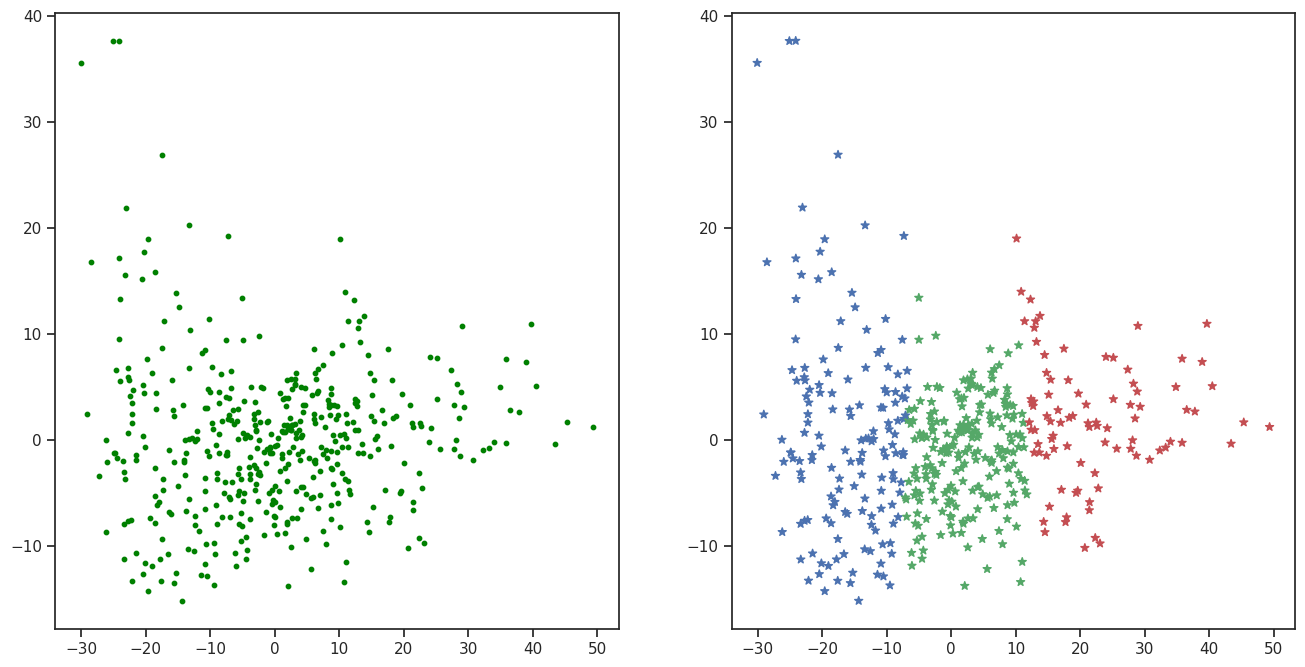

In [79]:

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[kmean.labels_], marker='*')

In [80]:

#### Birch algorithm
### Choosing best Num cluster for Birch
for NumbOfcluster in range(2, 10):
    birch = Birch(n_clusters=NumbOfcluster)
    birch.fit(X)
    labels = birch.labels_
    
    birch_Sil = metrics.silhouette_score(X, birch.labels_, metric='euclidean')
    print('Birch silhouette ',KMeans_Sil)

Birch silhouette  0.24471142714917848
Birch silhouette  0.24471142714917848
Birch silhouette  0.24471142714917848
Birch silhouette  0.24471142714917848
Birch silhouette  0.24471142714917848
Birch silhouette  0.24471142714917848
Birch silhouette  0.24471142714917848
Birch silhouette  0.24471142714917848


In [81]:

#### kmeans algorithm
# start = time.time()
birch = Birch(n_clusters=3)
birch.fit(X)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESET)

Birch()

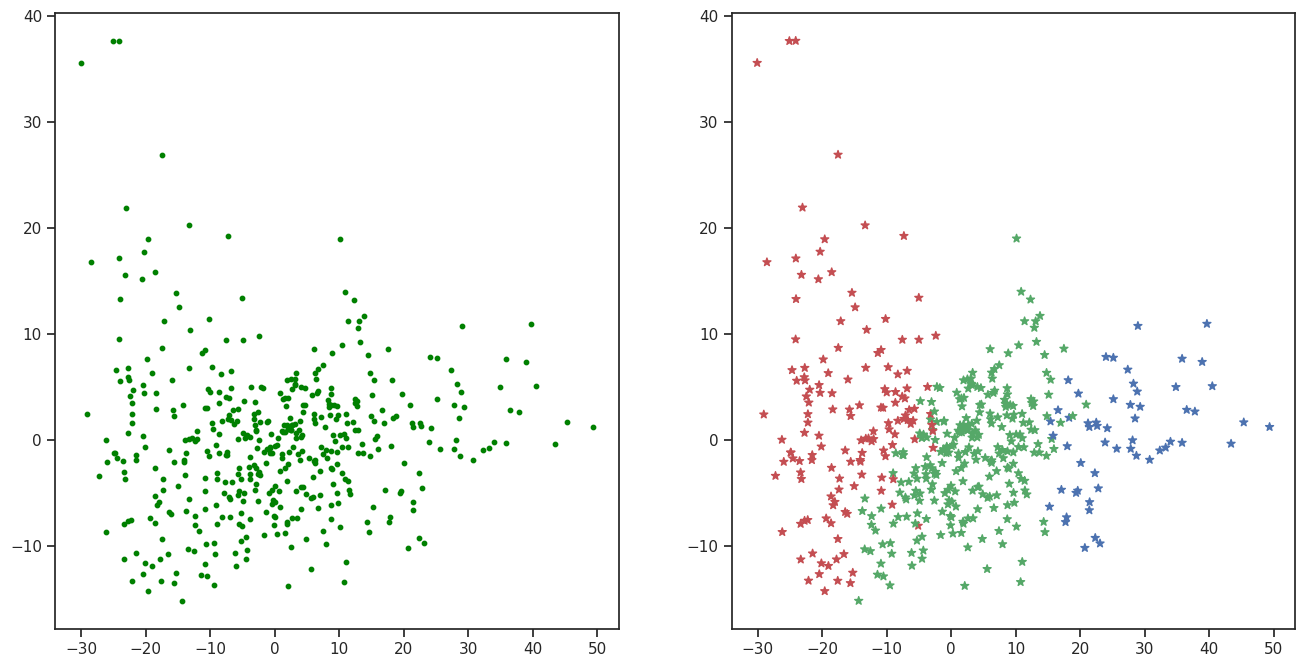

In [82]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[birch.labels_], marker='*')

In [83]:
X.describe()

,temp,dew,humidity,precip,windspeed,pollen_intensity,Clear,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",tem amplitude
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,16.593860,10.912719,71.957895,1.378419,21.939254,1.537281,0.537281,0.074561,0.293860,0.002193,0.092105,7.531798
std,4.270065,3.923154,14.455105,4.355401,6.726834,1.053895,0.499156,0.262971,0.456029,0.046829,0.289492,2.709458
min,7.400000,-3.200000,24.100000,0.000000,8.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000
25%,13.600000,8.275000,63.075000,0.000000,17.575000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.600000
50%,15.900000,10.800000,72.000000,0.000000,21.700000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.350000
75%,19.925000,14.025000,82.225000,0.287000,25.200000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,9.400000
max,28.600000,21.000000,99.300000,39.750000,59.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.000000


In [95]:

#### kmeans algorithm
# start = time.time()
dbscan = DBSCAN(eps=4, min_samples=5)
dbscan.fit(X)
# end = time.time()
# print(Fore.BLUE + "k-mean algorithm time is :", end - start)
# print(Fore.RESET)
Counter(dbscan.labels_)

Counter({0: 228, 4: 7, -1: 194, 6: 5, 1: 6, 2: 4, 3: 5, 5: 7})

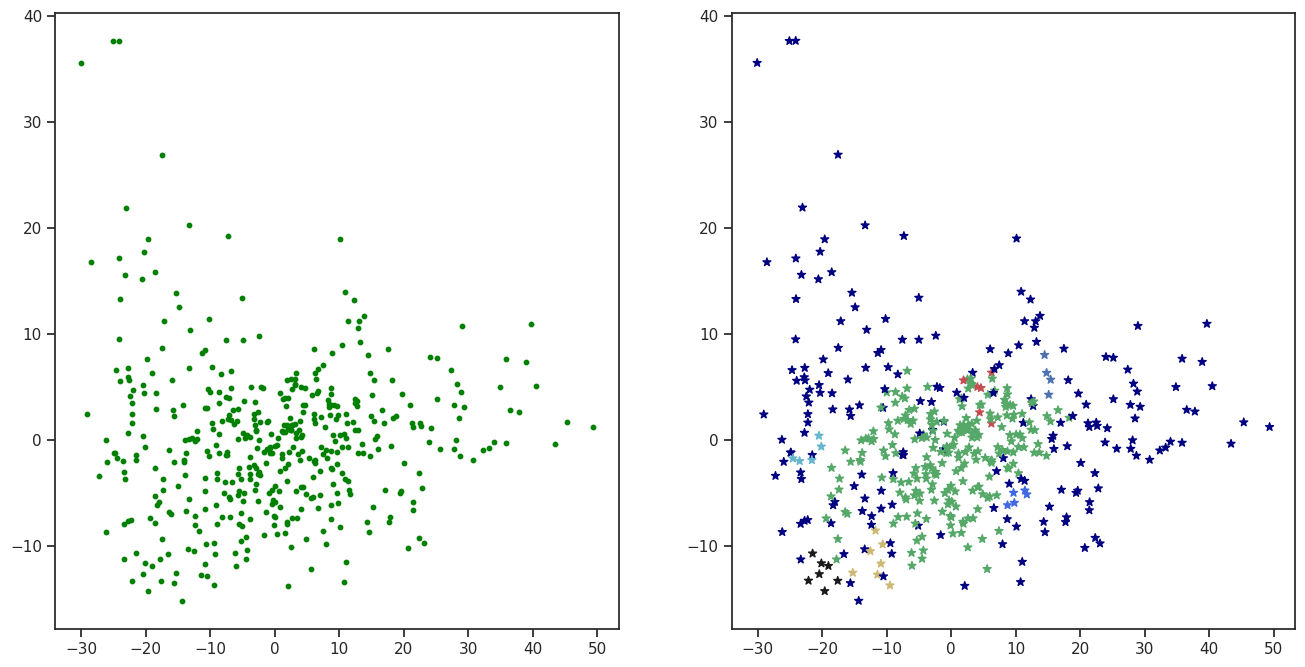

In [96]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(121)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1],c='green', marker='o', s=10)
ax = fig.add_subplot(122)
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=colors[dbscan.labels_], marker='*')

In [97]:
X['Kmeans label'] = kmean.labels_
X['birch'] = birch.labels_
X['dbscan'] = dbscan.labels_
X['risk level'] = y 
X

,temp,dew,humidity,precip,windspeed,pollen_intensity,Clear,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",tem amplitude,Kmeans label,birch,dbscan,risk level
0,11.5,5.1,66.2,0.000,11.1,1.0,1.0,0.0,0.0,0.0,0.0,8.4,0,0,0,3
1,10.9,7.4,80.2,0.000,16.4,1.0,1.0,0.0,0.0,0.0,0.0,8.3,2,0,0,2
2,7.4,6.1,91.7,0.005,12.6,1.0,0.0,0.0,1.0,0.0,0.0,5.8,2,1,4,1
3,9.7,6.9,84.1,0.000,16.8,1.0,1.0,0.0,0.0,0.0,0.0,6.5,2,0,-1,3
4,10.5,5.5,71.4,0.000,14.9,1.0,1.0,0.0,0.0,0.0,0.0,7.0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,13.3,7.0,67.0,0.000,18.1,1.0,0.0,1.0,0.0,0.0,0.0,7.8,0,0,0,1
452,13.5,5.9,60.9,0.000,23.9,1.0,0.0,1.0,0.0,0.0,0.0,7.3,0,0,0,1
453,14.4,9.6,73.6,0.000,21.9,1.0,0.0,1.0,0.0,0.0,0.0,7.4,0,0,0,1
454,12.3,10.8,90.7,8.742,28.7,1.0,0.0,0.0,0.0,0.0,1.0,4.4,2,1,-1,1


In [98]:
X.to_csv('result.csv', index=False)

In [99]:
X[['Kmeans label', 'birch', 'dbscan', 'risk level']].corr()

,Kmeans label,birch,dbscan,risk level
Kmeans label,1.000000,0.520229,-0.042265,0.053688
birch,0.520229,1.000000,-0.239402,0.033856
dbscan,-0.042265,-0.239402,1.000000,-0.025253
risk level,0.053688,0.033856,-0.025253,1.000000


In [100]:
X['risk level'].value_counts()

2    183
1    162
3    111
Name: risk level, dtype: int64

In [101]:
X[X['Kmeans label']==0]['risk level'].value_counts()

2    86
1    81
3    50
Name: risk level, dtype: int64

In [102]:
X[X['Kmeans label']==1]['risk level'].value_counts()

1    34
2    33
3    21
Name: risk level, dtype: int64

In [103]:
X[X['Kmeans label']==2]['risk level'].value_counts()

2    64
1    47
3    40
Name: risk level, dtype: int64

In [104]:
X[X['birch']==0]['risk level'].value_counts()

2    105
1     95
3     59
Name: risk level, dtype: int64

In [105]:
X[X['birch']==1]['risk level'].value_counts()

2    59
1    46
3    36
Name: risk level, dtype: int64

In [106]:
X[X['birch']==2]['risk level'].value_counts()

1    21
2    19
3    16
Name: risk level, dtype: int64

In [107]:
X[X['dbscan']==0]['risk level'].value_counts()

2    91
1    88
3    49
Name: risk level, dtype: int64

In [108]:
X[X['dbscan']==1]['risk level'].value_counts()

2    6
Name: risk level, dtype: int64

In [109]:
X[X['dbscan']==-1]['risk level'].value_counts()

2    72
1    65
3    57
Name: risk level, dtype: int64